# **Fisher Score- Chi2 Test For Feature Selection**

Compute chi-squared stats between each non-negative feature and class.

*   This score should be used to evaluate ccategorical variables in a classification task.

This score can be select the number of features with the highest values for the test chi-squared statistic from X, which is must contain only non-negative features such as booleans or frequencies (e.g.., term counts in document classification), relative to the classes.

Recall that the chi-square test meassures dependence between stochastic variables, so using this function "weeds out" the features that are the most likely to be independent of class and therefore irrelevant for classification. The Chi square statistic is commonlly used for testing relationship between categorical variables.

It compares the observed distribution of the different classes  of target Y among thae different ccatgories of the feature, against the expected distribution of the target classes, regardless of the feature categories.



In [ ]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
## ['sex','embarked','alone','pclass','survived']
df = df[['sex','embarked','alone','pclass','survived']]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


In [ ]:
import numpy as np
df['sex']= np.where(df['sex'] == 'male', 1,0)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,sex,embarked,alone,pclass,survived
0,1,S,False,3,0
1,0,C,False,1,1
2,0,S,True,3,1
3,0,S,False,1,1
4,1,S,True,3,0


In [ ]:
## Let's perform label encoding on embarked column
ordinal_label = {k: i for i, k in enumerate(df['embarked'].unique(),0)}
df['embarked'] = df['embarked'].map(ordinal_label)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,False,3,0
1,0,1,False,1,1
2,0,0,True,3,1
3,0,0,False,1,1
4,1,0,True,3,0


In [ ]:
## Let's perform Label encoding on alone column
df['alone'] = np.where(df['alone'] == True, 1, 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,0,3,0
1,0,1,0,1,1
2,0,0,1,3,1
3,0,0,0,1,1
4,1,0,1,3,0


In [ ]:
### Train test split is usally done to avoid overfitting 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['sex','embarked','alone','pclass']],
                                                    df['survived'],test_size=0.3, random_state=100)

In [ ]:
X_train.head()

,sex,embarked,alone,pclass
69,1,0,0,3
85,0,0,0,3
794,1,0,1,3
161,0,0,1,2
815,1,0,1,1


In [ ]:
X_train.isnull().sum()

sex         0
embarked    0
alone       0
pclass      0
dtype: int64

**Chi2 Test reutrns two values**


*   F-score is hihger means feature is more significcant 
*   P-value is lower means feature is more significant



In [ ]:
from sklearn.feature_selection import chi2
f_p_values = chi2(X_train, y_train)

In [ ]:
f_p_values

(array([65.67929505,  7.55053653, 10.88471585, 21.97994154]),
 array([5.30603805e-16, 5.99922095e-03, 9.69610546e-04, 2.75514881e-06]))

In [ ]:
import pandas as pd
f_values = pd.Series(f_p_values[0])
f_values.index = X_train.columns
f_values.sort_index(ascending = False)

sex         65.679295
pclass      21.979942
embarked     7.550537
alone       10.884716
dtype: float64

In [ ]:
p_values = pd.Series(f_p_values[1])
p_values.index = X_train.columns
p_values.sort_index(ascending = False)

sex         5.306038e-16
pclass      2.755149e-06
embarked    5.999221e-03
alone       9.696105e-04
dtype: float64

**Observation**

Sex column is the most important column when compared to the output feature survived.

# **Chi2 Test in Another Way on the same dataset**

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

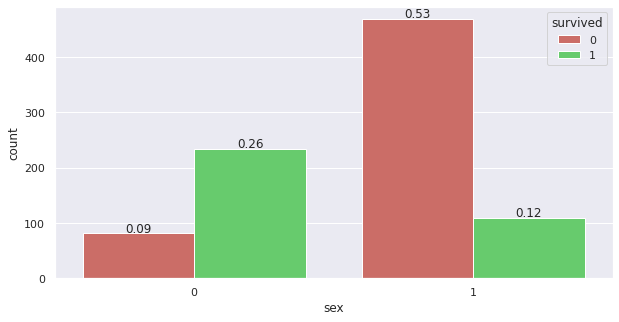

In [ ]:
# Let's apply chi2 test on sex column
sns.set(style = "darkgrid")
sns.set_palette("hls",3)
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.countplot(x = "sex", hue = "survived", data = df)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
          height + 3,
          "{:1.2f}".format(height/df.shape[0]),
          ha = "center")

In [ ]:
sex = pd.crosstab(index=df['sex'],columns=df['survived'], margins = True)
print(sex,'\n')
(chi2_1, p_1, dof_1,_)=stats.chi2_contingency([sex.iloc[0].values,sex.iloc[1].values,sex.iloc[2].values])
print("chi2    :", chi2_1)
print("p-value :",p_1)
print("Degree of Freedom :",dof_1)

survived    0    1  All
sex                    
0          81  233  314
1         468  109  577
All       549  342  891 

chi2    : 263.05057407065567
p-value : 1.0036732821369117e-55
Degree of Freedom : 4


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


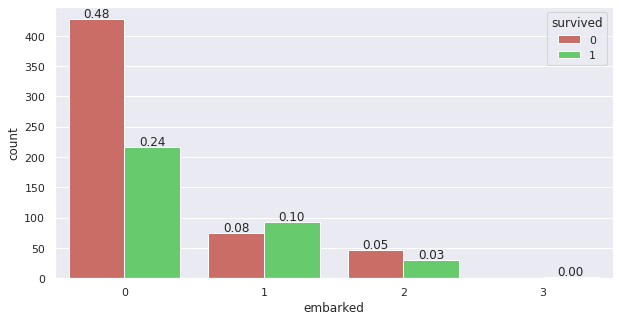

In [ ]:
# Let's apply chi2 test on embarked column
sns.set(style = "darkgrid")
sns.set_palette("hls",3)
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.countplot(x = "embarked", hue = "survived", data = df)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
          height + 3,
          "{:1.2f}".format(height/df.shape[0]),
          ha = "center")

In [ ]:
embarked = pd.crosstab(index=df['embarked'],columns=df['survived'], margins = True)
print(embarked,'\n')
(chi2_2, p_2, dof_2,_)=stats.chi2_contingency([embarked.iloc[0].values,embarked.iloc[1].values,embarked.iloc[2].values])
print("chi2    :", chi2_2)
print("p-value :",p_2)
print("Degree of Freedom :",dof_2)

survived    0    1  All
embarked               
0         427  217  644
1          75   93  168
2          47   30   77
3           0    2    2
All       549  342  891 

chi2    : 26.48914983923762
p-value : 2.5211790578063172e-05
Degree of Freedom : 4


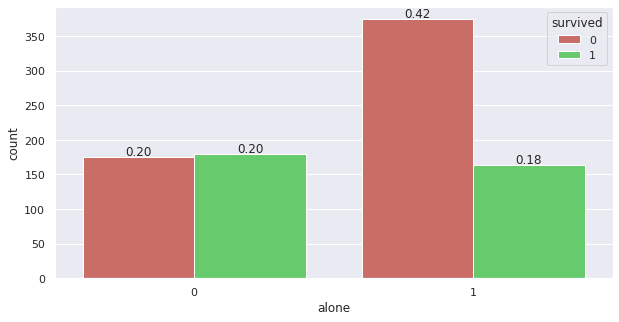

In [ ]:
# Let's apply chi2 test on alone column
sns.set(style = "darkgrid")
sns.set_palette("hls",3)
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.countplot(x = "alone", hue = "survived", data = df)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
          height + 3,
          "{:1.2f}".format(height/df.shape[0]),
          ha = "center")

In [ ]:
alone = pd.crosstab(index=df['alone'],columns=df['survived'], margins = True)
print(alone,'\n')
(chi2_3, p_3, dof_3,_)=stats.chi2_contingency([alone.iloc[0].values,alone.iloc[1].values,alone.iloc[2].values])
print("chi2    :", chi2_3)
print("p-value :",p_3)
print("Degree of Freedom :",dof_3)

survived    0    1  All
alone                  
0         175  179  354
1         374  163  537
All       549  342  891 

chi2    : 36.85013084754587
p-value : 1.9340079186274333e-07
Degree of Freedom : 4


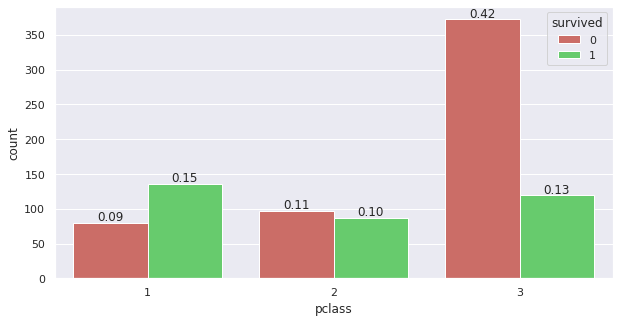

In [ ]:
# Let's apply chi2 test on pclass column
sns.set(style = "darkgrid")
sns.set_palette("hls",3)
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.countplot(x = "pclass", hue = "survived", data = df)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
          height + 3,
          "{:1.2f}".format(height/df.shape[0]),
          ha = "center")

In [ ]:
pclass = pd.crosstab(index=df['pclass'],columns=df['survived'], margins = True)
print(pclass,'\n')
(chi2_4, p_4, dof_4,_)=stats.chi2_contingency([pclass.iloc[0].values,pclass.iloc[1].values,pclass.iloc[2].values])
print("chi2    :", chi2_4)
print("p-value :",p_4)
print("Degree of Freedom :",dof_4)

survived    0    1  All
pclass                 
1          80  136  216
2          97   87  184
3         372  119  491
All       549  342  891 

chi2    : 102.88898875696057
p-value : 2.385832057994988e-21
Degree of Freedom : 4


In [ ]:
chi2_test = pd.DataFrame({
    'Features': ['sex','embarked','alone','pclass'],
    'Chi2 value': [chi2_1,chi2_2,chi2_3,chi2_4],
    'P value': [p_1,p_2,p_3,p_4],
    'Degree Of Freeddom': [dof_1,dof_2,dof_3,dof_4]})
chi2_test.sort_values(by=['Chi2 value','P value','Degree Of Freeddom'], inplace = True, ascending=[False, False, False])
chi2_test

,Features,Chi2 value,P value,Degree Of Freeddom
0,sex,263.050574,1.003673e-55,4
3,pclass,102.888989,2.385832e-21,4
2,alone,36.850131,1.934008e-07,4
1,embarked,26.489150,2.521179e-05,4
